In [3]:
from zipfile import ZipFile
file_name="kaggle data set.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')
	

Done


In [ ]:
!pip install -q keras

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4199834244635371250, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16605003990325837246
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6698947390522421477
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11146783616
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14066847713476876349
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [4]:
import numpy as np 
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,UpSampling2D,InputLayer,Reshape

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

from keras.layers import LeakyReLU
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import Bunch
import math
import pandas as pd
import datetime
import time
import csv
import numpy as np

from sklearn.model_selection import train_test_split

import os
from PIL import Image
import sys


In [5]:
def getData(pathd,shape=(70,70)):
    image_dir=Path(pathd)
    Alldatas=[]
    img_data=[]
    for i in  image_dir.iterdir():
        #print(i)
        img_data.append(i)
     
    for i in img_data:
        img=load_img(i)
        img=img.resize((shape[0],shape[1]))
        x=img_to_array(img)
        #print(x.shape)
        Alldatas.append(x)
    return Alldatas

In [ ]:
scale=(540,258)
all_img=getData("/content/kaggle data set/train",scale)
all_img_y=getData("/content/kaggle data set/train_cleaned",scale)
#%%
all_img=tf.image.rgb_to_grayscale(all_img)
all_img_y=tf.image.rgb_to_grayscale(all_img_y)

In [6]:
def prepare(arr):
    arr=np.asarray(arr,dtype="float32")
    arr2=arr/255
    return arr2

In [ ]:
# EDIT DATASET AND RESHAPE
train = prepare(all_img)
train_y = prepare(all_img_y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,train_y,test_size=0.1,random_state=42)

In [ ]:
from keras.layers import Activation
#from keras.layers.normalization import BatchNormalization
from keras import optimizers

opt = optimizers.RMSprop(learning_rate=0.001)
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',strides=1, input_shape=(258,540,1),data_format="channels_last"))
model.add(LeakyReLU(alpha=0.05))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',strides=1, input_shape=(258,540,1),data_format="channels_last"))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same',strides=1,data_format="channels_last"))
model.add(LeakyReLU(alpha=0.05))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',strides=1,data_format="channels_last"))
model.add(LeakyReLU(alpha=0.05))
model.add(UpSampling2D((2, 2))) 
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same',strides=1,data_format="channels_last"))

model.compile(loss="mean_squared_error",optimizer=opt)
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 258, 540, 64)      640       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 258, 540, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 258, 540, 64)      36928     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 258, 540, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 129, 270, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 129, 270, 64)      36928     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 129, 270, 64)     

In [ ]:
model.fit(x_train,y_train,epochs = 500,batch_size = 7,validation_data = (x_test,y_test))


Epoch 1/500
19/19 [==============================] - 6s 324ms/step - loss: 0.0797 - val_loss: 0.0707
Epoch 2/500
19/19 [==============================] - 6s 315ms/step - loss: 0.0452 - val_loss: 0.0324
Epoch 3/500
19/19 [==============================] - 6s 314ms/step - loss: 0.0245 - val_loss: 0.0208
Epoch 4/500
19/19 [==============================] - 6s 314ms/step - loss: 0.0167 - val_loss: 0.0184
Epoch 5/500
19/19 [==============================] - 6s 315ms/step - loss: 0.0126 - val_loss: 0.0141
Epoch 6/500
19/19 [==============================] - 6s 316ms/step - loss: 0.0100 - val_loss: 0.0081
Epoch 7/500
19/19 [==============================] - 6s 313ms/step - loss: 0.0083 - val_loss: 0.0112
Epoch 8/500
19/19 [==============================] - 6s 315ms/step - loss: 0.0078 - val_loss: 0.0058
Epoch 9/500
19/19 [==============================] - 6s 316ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 10/500
19/19 [==============================] - 6s 317ms/step - loss: 0.0055 - val_lo

In [ ]:
model.save("model_500.h5")
print("Saved model to disk")

Saved model to disk


In [7]:
from keras.models import load_model
model = load_model('model_500.h5')

In [8]:
import cv2

scale=(540,258)
all_test_img=getData("/content/kaggle data set/test",scale)
all_test_img=tf.image.rgb_to_grayscale(all_test_img)
test_t = prepare(all_test_img)

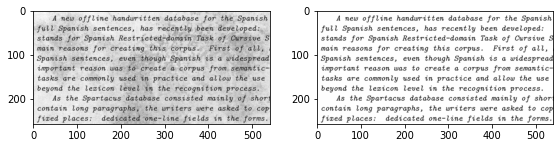

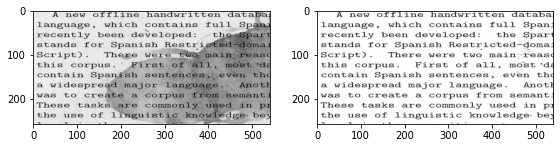

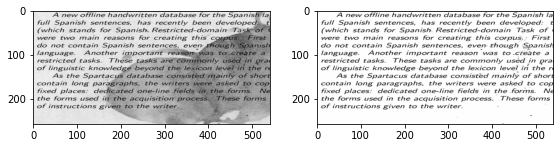

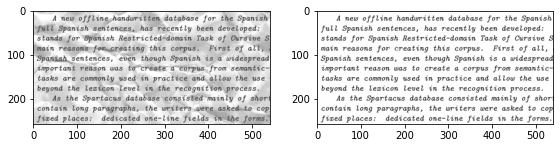

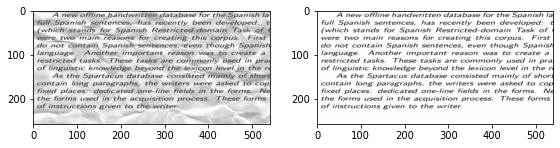

In [9]:
for i in range(0,5):
    check=test_t[i]
    predicted_label=model.predict(check.reshape((1,)+check.shape)).reshape(258,540,1)
    plt.figure(figsize=(50,50))
    plt.subplot(10,10,1)
    plt.imshow(array_to_img(check),cmap="gray")
    plt.subplot(10,10,2)
    plt.imshow(array_to_img(predicted_label),cmap="gray")